# BUILDING MODELS THAT IDENTIFY AND PREDICTS DIFFERENT ATTENTION LEVELS

## IMPORTING THE DATASET AND DESIRED LIBRARIES


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
df=pd.read_csv('features_raw.csv')

In [28]:
df.drop("Unnamed: 32",axis=1,inplace=True)

In [29]:
df

,Fp1,AF3,F3,F7,FC5,FC1,C3,T7,CP5,CP1,...,FC2,Cz,C4,T8,CP6,CP2,P4,P8,PO4,O2
0,0.057813,-1.335266,4.640480,0.219573,7.473817,2.314842,1.918097,-9.257533,9.089943,-7.104519,...,-30.579542,-2.241480,1.415335,2.406646,12.864059,4.021099,-2.828598,-2.588735,2.637905,-5.226618
1,1.367408,10.259654,3.345409,7.897852,-2.446051,-1.655035,-6.301423,-7.290317,-3.546453,-5.705187,...,-1.290516,-2.568397,-5.651418,-0.096730,-4.930759,-1.722504,-6.111309,0.094893,-3.521353,1.887093
2,-1.783132,4.133553,-0.951680,-1.624803,-1.827309,-2.280364,-2.279225,9.151344,-0.239575,-0.057604,...,11.424923,-2.132823,-0.521117,8.605298,-4.499946,-3.232839,-4.249645,-3.687167,-7.383004,-4.489537
3,-3.690217,-0.814000,2.295469,0.901445,8.323679,1.127906,6.356886,11.642082,9.354154,-1.662478,...,-14.721411,-0.506117,-1.154866,-3.940251,7.390881,2.129897,-0.794675,-1.959021,2.774530,-6.323060
4,2.137114,6.420466,6.122230,10.015321,3.106394,3.183129,3.658535,4.571793,4.917712,-2.325940,...,-13.815090,1.813907,-6.444635,-27.680880,0.641364,1.996658,-0.445779,2.614021,6.161845,3.308816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8059,2.371097,6.525279,-1.470521,-2.535683,-8.222570,-2.062185,-5.890198,11.508550,-14.298769,9.859735,...,68.066378,0.407407,-0.032451,12.929205,-27.406610,-14.864499,-6.631102,7.509646,-25.823920,-3.558200
8060,5.408372,7.813431,-5.203169,-13.254773,-18.839062,-1.866768,-8.164257,17.100103,-23.600410,27.898805,...,146.337550,3.976006,6.957139,11.972493,-52.080426,-29.577173,-11.663913,5.416705,-57.219852,-11.860173
8061,-1.308237,1.166170,-3.158261,-9.249685,-7.438499,0.591557,-1.791961,16.107009,-9.831608,17.049193,...,76.812473,3.080318,3.275846,-22.535264,-26.538050,-15.409645,-4.558339,4.718691,-28.783795,-3.566724
8062,-2.095682,4.284166,-6.136204,-4.000436,-11.495979,-2.753036,-7.090403,5.933243,-13.990339,11.807037,...,70.180341,0.583702,-1.521174,-12.615231,-26.169920,-16.098081,-6.099934,7.850973,-28.039497,-3.643652


In [30]:
df.columns

Index(['Fp1', 'AF3', 'F3', 'F7', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'P3',
       'P7', 'PO3', 'O1', 'Oz', 'Pz', 'Fp2', 'AF4', 'Fz', 'F4', 'F8', 'FC6',
       'FC2', 'Cz', 'C4', 'T8', 'CP6', 'CP2', 'P4', 'P8', 'PO4', 'O2'],
      dtype='object')

## DEALING WITH OUTLIERS AND NORMALIZING THE DATASET


<Axes: >

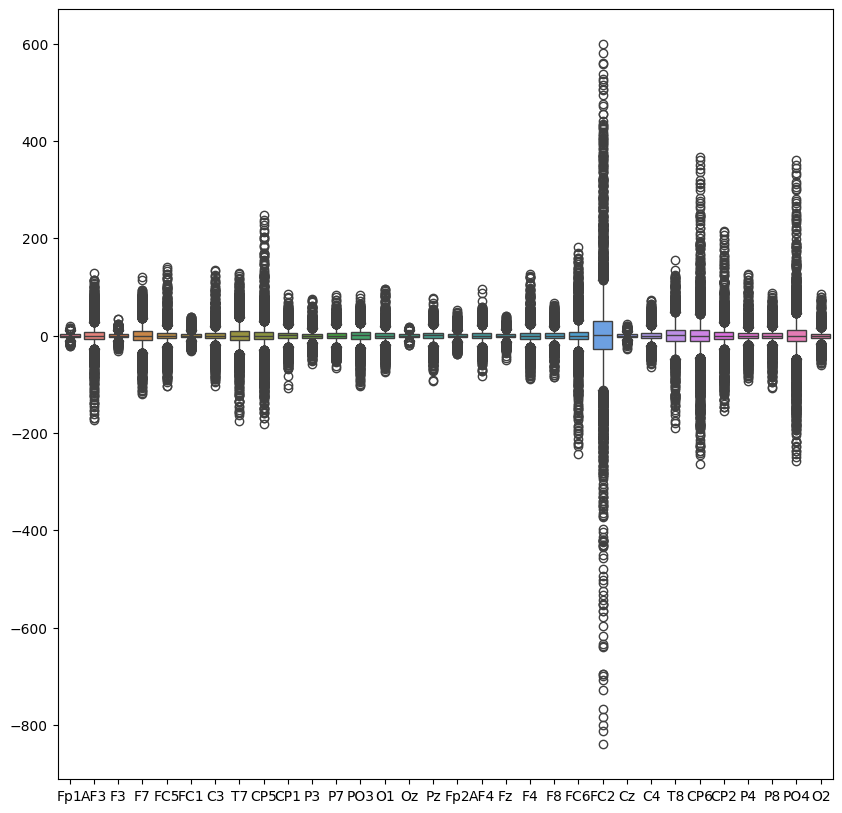

In [45]:
plt.figure(figsize=(10,10))
sns.boxplot(df)
#FIGURING OUT OUTLIERS

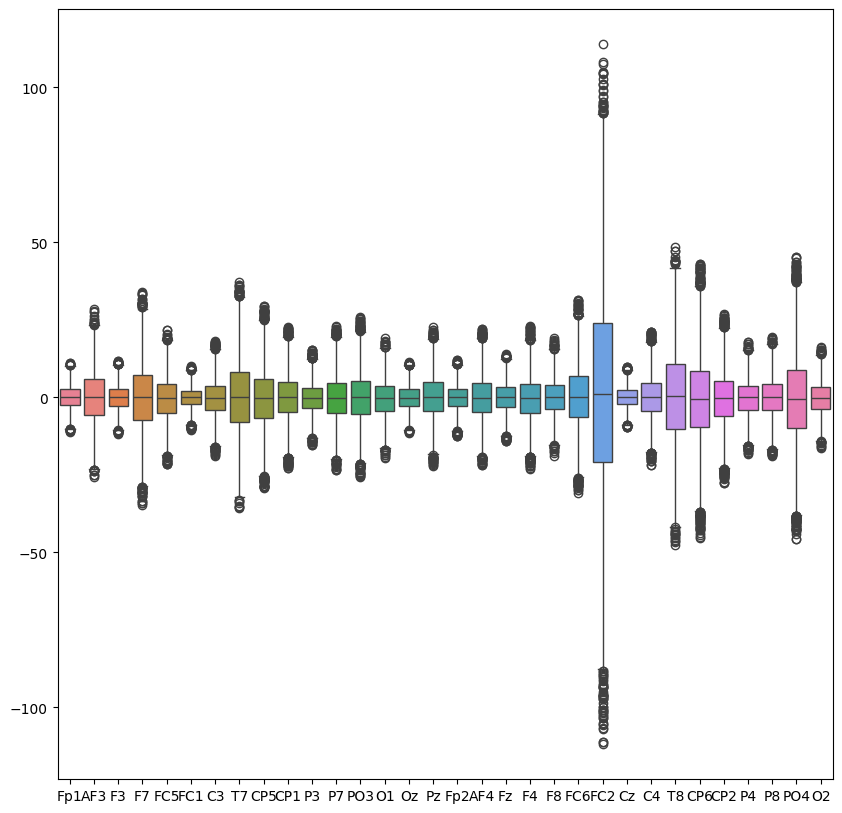

In [32]:
# DEALING WITH OUTLIERS USING INTER-QUARTILE RANGE(IQR) METHOD
# Calculate Q1, Q3, and IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_filtered = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Visualize the filtered data
plt.figure(figsize=(10,10))
sns.boxplot(df_filtered)
plt.show()

# Here we almost diminished the outliers

In [33]:
df

,Fp1,AF3,F3,F7,FC5,FC1,C3,T7,CP5,CP1,...,FC2,Cz,C4,T8,CP6,CP2,P4,P8,PO4,O2
0,0.057813,-1.335266,4.640480,0.219573,7.473817,2.314842,1.918097,-9.257533,9.089943,-7.104519,...,-30.579542,-2.241480,1.415335,2.406646,12.864059,4.021099,-2.828598,-2.588735,2.637905,-5.226618
1,1.367408,10.259654,3.345409,7.897852,-2.446051,-1.655035,-6.301423,-7.290317,-3.546453,-5.705187,...,-1.290516,-2.568397,-5.651418,-0.096730,-4.930759,-1.722504,-6.111309,0.094893,-3.521353,1.887093
2,-1.783132,4.133553,-0.951680,-1.624803,-1.827309,-2.280364,-2.279225,9.151344,-0.239575,-0.057604,...,11.424923,-2.132823,-0.521117,8.605298,-4.499946,-3.232839,-4.249645,-3.687167,-7.383004,-4.489537
3,-3.690217,-0.814000,2.295469,0.901445,8.323679,1.127906,6.356886,11.642082,9.354154,-1.662478,...,-14.721411,-0.506117,-1.154866,-3.940251,7.390881,2.129897,-0.794675,-1.959021,2.774530,-6.323060
4,2.137114,6.420466,6.122230,10.015321,3.106394,3.183129,3.658535,4.571793,4.917712,-2.325940,...,-13.815090,1.813907,-6.444635,-27.680880,0.641364,1.996658,-0.445779,2.614021,6.161845,3.308816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8059,2.371097,6.525279,-1.470521,-2.535683,-8.222570,-2.062185,-5.890198,11.508550,-14.298769,9.859735,...,68.066378,0.407407,-0.032451,12.929205,-27.406610,-14.864499,-6.631102,7.509646,-25.823920,-3.558200
8060,5.408372,7.813431,-5.203169,-13.254773,-18.839062,-1.866768,-8.164257,17.100103,-23.600410,27.898805,...,146.337550,3.976006,6.957139,11.972493,-52.080426,-29.577173,-11.663913,5.416705,-57.219852,-11.860173
8061,-1.308237,1.166170,-3.158261,-9.249685,-7.438499,0.591557,-1.791961,16.107009,-9.831608,17.049193,...,76.812473,3.080318,3.275846,-22.535264,-26.538050,-15.409645,-4.558339,4.718691,-28.783795,-3.566724
8062,-2.095682,4.284166,-6.136204,-4.000436,-11.495979,-2.753036,-7.090403,5.933243,-13.990339,11.807037,...,70.180341,0.583702,-1.521174,-12.615231,-26.169920,-16.098081,-6.099934,7.850973,-28.039497,-3.643652


## SPLITTING THE DATASET INTO TRAINING AND TESTING AND SEPRATING THEM INTO 2 DIFFERENT CSV FILES.

In [34]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(df_filtered, test_size=0.2, random_state=42)

# Save the training data to a CSV file
train_data.to_csv('train_data.csv', index=False)

# Save the testing data to a CSV file
test_data.to_csv('test_data.csv', index=False)


# PREDICTING THE ATTENTION LEVEL'S VALUES USING MACHINE LEARNING MODELS

## TOOK THE AVERAGE OF FOUR COLUMNS AND NORMALIZE THEM IN RANGE OF [0,1]

In [35]:
# Load the training data
train_data = pd.read_csv('train_data.csv')

# Calculate the predicted attention values based on Fz, Pz, P3, and Cz
train_data['predicted_attention_values'] = (train_data['Fz'] + train_data['Pz'] + train_data['P3'] + train_data['Cz']) / 4

# Normalize the predicted attention values to the range of 0 to 1
train_data['predicted_attention_values'] = (train_data['predicted_attention_values'] - train_data['predicted_attention_values'].min()) / (train_data['predicted_attention_values'].max() - train_data['predicted_attention_values'].min())

# Display the updated training data
print(train_data)

           Fp1        AF3        F3         F7       FC5       FC1         C3  \
0     3.708934   5.061280 -3.123347   2.933691 -8.002952 -5.987876 -12.309737   
1    -7.927196 -11.433300 -8.027478  -9.650296 -2.199496 -4.937627   1.260075   
2    -6.429932  -9.224808 -4.296097 -13.552336 -0.784173  0.385988   3.018256   
3    -0.638978  11.566954  2.720888  19.370928  0.446747 -0.701653  -7.308488   
4    -1.660779  13.052952  1.298024  15.908965 -5.622669 -4.145418  -9.732799   
...        ...        ...       ...        ...       ...       ...        ...   
5175 -2.739678  -8.666965 -4.951273  -4.821615 -1.857039 -5.496849   0.836375   
5176 -6.131051  -9.033860  1.364530  -2.649468  7.789189  1.918759   8.116557   
5177  1.992827 -13.923473 -1.739318 -19.138329  2.194659  1.332673   6.587291   
5178 -3.165632   0.595415  1.143698   3.834827 -3.649280  1.088625  -2.709752   
5179  2.758019  -0.195642  0.230905  -7.967161 -1.524932  0.642656   0.284338   

             T7        CP5 

## APPLIED RANDOM FOREST MODEL

In [36]:
# Predicted the range of values from 0 to 1 and calculated using rndom forest model the values were stored in new column
# Select the features and target variable
X_train = train_data[['Fz', 'Pz', 'P3', 'Cz']]
y_train = train_data['predicted_attention_values']

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the training data
train_data['predicted_attention_values_rf'] = rf_model.predict(X_train)

# Normalize the predicted values to the range of 0 to 1
scaler = MinMaxScaler()
train_data['predicted_attention_values_rf'] = scaler.fit_transform(train_data[['predicted_attention_values_rf']])

# Display the updated training data
print(train_data)


           Fp1        AF3        F3         F7       FC5       FC1         C3  \
0     3.708934   5.061280 -3.123347   2.933691 -8.002952 -5.987876 -12.309737   
1    -7.927196 -11.433300 -8.027478  -9.650296 -2.199496 -4.937627   1.260075   
2    -6.429932  -9.224808 -4.296097 -13.552336 -0.784173  0.385988   3.018256   
3    -0.638978  11.566954  2.720888  19.370928  0.446747 -0.701653  -7.308488   
4    -1.660779  13.052952  1.298024  15.908965 -5.622669 -4.145418  -9.732799   
...        ...        ...       ...        ...       ...       ...        ...   
5175 -2.739678  -8.666965 -4.951273  -4.821615 -1.857039 -5.496849   0.836375   
5176 -6.131051  -9.033860  1.364530  -2.649468  7.789189  1.918759   8.116557   
5177  1.992827 -13.923473 -1.739318 -19.138329  2.194659  1.332673   6.587291   
5178 -3.165632   0.595415  1.143698   3.834827 -3.649280  1.088625  -2.709752   
5179  2.758019  -0.195642  0.230905  -7.967161 -1.524932  0.642656   0.284338   

             T7        CP5 

## APPLIED XGBOOST MODEL

In [37]:
# Predicted the range of values from 0 to 1 and calculated using XGBOOST model by taking learning rate as default 0.3 the values were stored in new column
# Select the features and target variable
X_train = train_data[['Fz', 'Pz', 'P3', 'Cz']]
y_train = train_data['predicted_attention_values']

# Create an XGBoost Regressor model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the training data with the learning rate of 0.3 (taken default only)
train_data['predicted_attention_values_xgb'] = xgb_model.predict(X_train)

# Normalize the predicted values to the range of 0 to 1
scaler = MinMaxScaler()
train_data['predicted_attention_values_xgb'] = scaler.fit_transform(train_data[['predicted_attention_values_xgb']])

# Display the updated training data
print(train_data)


           Fp1        AF3        F3         F7       FC5       FC1         C3  \
0     3.708934   5.061280 -3.123347   2.933691 -8.002952 -5.987876 -12.309737   
1    -7.927196 -11.433300 -8.027478  -9.650296 -2.199496 -4.937627   1.260075   
2    -6.429932  -9.224808 -4.296097 -13.552336 -0.784173  0.385988   3.018256   
3    -0.638978  11.566954  2.720888  19.370928  0.446747 -0.701653  -7.308488   
4    -1.660779  13.052952  1.298024  15.908965 -5.622669 -4.145418  -9.732799   
...        ...        ...       ...        ...       ...       ...        ...   
5175 -2.739678  -8.666965 -4.951273  -4.821615 -1.857039 -5.496849   0.836375   
5176 -6.131051  -9.033860  1.364530  -2.649468  7.789189  1.918759   8.116557   
5177  1.992827 -13.923473 -1.739318 -19.138329  2.194659  1.332673   6.587291   
5178 -3.165632   0.595415  1.143698   3.834827 -3.649280  1.088625  -2.709752   
5179  2.758019  -0.195642  0.230905  -7.967161 -1.524932  0.642656   0.284338   

             T7        CP5 

In [38]:
# Calculated the errors and spread of data after trainig from XGBOOST model
# Calculate the mean squared error
mse = mean_squared_error(train_data['predicted_attention_values'], train_data['predicted_attention_values_xgb'])
print(f'Mean Squared Error: {mse}')

# Calculate the R-squared score
r2 = r2_score(train_data['predicted_attention_values'], train_data['predicted_attention_values_xgb'])
print(f'R-squared: {r2}')


Mean Squared Error: 2.9219998430816315e-05
R-squared: 0.9986605939563449


In [39]:
# Load the testing data
test_data = pd.read_csv('test_data.csv')

# Calculate the predicted attention values based on Fz, Pz, P3, and Cz
test_data['predicted_attention_values'] = (test_data['Fz'] + test_data['Pz'] + test_data['P3'] + test_data['Cz']) / 4

# Normalize the predicted attention values to the range of 0 to 1
test_data['predicted_attention_values'] = (test_data['predicted_attention_values'] - test_data['predicted_attention_values'].min()) / (test_data['predicted_attention_values'].max() - test_data['predicted_attention_values'].min())

# Select the features and target variable for testing data
X_test = test_data[['Fz', 'Pz', 'P3', 'Cz']]
y_test = test_data['predicted_attention_values']

# Make predictions on the testing data using the trained XGBoost model
test_data['predicted_attention_values_xgb'] = xgb_model.predict(X_test)

# Normalize the predicted values to the range of 0 to 1
scaler = MinMaxScaler()
test_data['predicted_attention_values_xgb'] = scaler.fit_transform(test_data[['predicted_attention_values_xgb']])

# Calculate the mean squared error for testing data
mse_test = mean_squared_error(test_data['predicted_attention_values'], test_data['predicted_attention_values_xgb'])
print(f'Mean Squared Error (Test Data): {mse_test}')

# Calculate the R-squared score for testing data
r2_test = r2_score(test_data['predicted_attention_values'], test_data['predicted_attention_values_xgb'])
print(f'R-squared (Test Data): {r2_test}')

# Calculate the mean squared error for training data (already calculated in the previous code)
print(f'Mean Squared Error (Training Data): {mse}')

# Calculate the R-squared score for training data (already calculated in the previous code)
print(f'R-squared (Training Data): {r2}')


Mean Squared Error (Test Data): 0.0007195945593462691
R-squared (Test Data): 0.9735767804031124
Mean Squared Error (Training Data): 2.9219998430816315e-05
R-squared (Training Data): 0.9986605939563449


In [40]:

# Make predictions on the testing data using the trained Random Forest model
test_data['predicted_attention_values_rf'] = rf_model.predict(X_test)

# Normalize the predicted values to the range of 0 to 1
scaler = MinMaxScaler()
test_data['predicted_attention_values_rf'] = scaler.fit_transform(test_data[['predicted_attention_values_rf']])

# Calculate the mean squared error for testing data (Random Forest)
mse_test_rf = mean_squared_error(test_data['predicted_attention_values'], test_data['predicted_attention_values_rf'])
print(f'Mean Squared Error (Test Data - Random Forest): {mse_test_rf}')

# Calculate the R-squared score for testing data (Random Forest)
r2_test_rf = r2_score(test_data['predicted_attention_values'], test_data['predicted_attention_values_rf'])
print(f'R-squared (Test Data - Random Forest): {r2_test_rf}')

# Calculate the mean squared error for training data (Random Forest)
mse_train_rf = mean_squared_error(train_data['predicted_attention_values'], train_data['predicted_attention_values_rf'])
print(f'Mean Squared Error (Training Data - Random Forest): {mse_train_rf}')

# Calculate the R-squared score for training data (Random Forest)
r2_train_rf = r2_score(train_data['predicted_attention_values'], train_data['predicted_attention_values_rf'])
print(f'R-squared (Training Data - Random Forest): {r2_train_rf}')


Mean Squared Error (Test Data - Random Forest): 0.001781690854893435
R-squared (Test Data - Random Forest): 0.9345770363308683
Mean Squared Error (Training Data - Random Forest): 0.00011939884307089871
R-squared (Training Data - Random Forest): 0.9945269151059934


## APPLIED DESCISION TREE

In [41]:
# Create a Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the training data
train_data['predicted_attention_values_dt'] = dt_model.predict(X_train)

# Normalize the predicted values to the range of 0 to 1
scaler = MinMaxScaler()
train_data['predicted_attention_values_dt'] = scaler.fit_transform(train_data[['predicted_attention_values_dt']])

# Calculate the mean squared error for training data (Decision Tree)
mse_train_dt = mean_squared_error(train_data['predicted_attention_values'], train_data['predicted_attention_values_dt'])
print(f'Mean Squared Error (Training Data - Decision Tree): {mse_train_dt}')

# Calculate the R-squared score for training data (Decision Tree)
r2_train_dt = r2_score(train_data['predicted_attention_values'], train_data['predicted_attention_values_dt'])
print(f'R-squared (Training Data - Decision Tree): {r2_train_dt}')


# Make predictions on the testing data using the trained Decision Tree model
test_data['predicted_attention_values_dt'] = dt_model.predict(X_test)

# Normalize the predicted values to the range of 0 to 1
scaler = MinMaxScaler()
test_data['predicted_attention_values_dt'] = scaler.fit_transform(test_data[['predicted_attention_values_dt']])

# Calculate the mean squared error for testing data (Decision Tree)
mse_test_dt = mean_squared_error(test_data['predicted_attention_values'], test_data['predicted_attention_values_dt'])
print(f'Mean Squared Error (Test Data - Decision Tree): {mse_test_dt}')

# Calculate the R-squared score for testing data (Decision Tree)
r2_test_dt = r2_score(test_data['predicted_attention_values'], test_data['predicted_attention_values_dt'])
print(f'R-squared (Test Data - Decision Tree): {r2_test_dt}')


Mean Squared Error (Training Data - Decision Tree): 0.0
R-squared (Training Data - Decision Tree): 1.0
Mean Squared Error (Test Data - Decision Tree): 0.001326353257582876
R-squared (Test Data - Decision Tree): 0.9512968477415972


## SHOWING THE ERRORS AND SPREAD OF THE DATA IN ORDER TO FIND HOW ACCURATE THE MODELS WERE

In [42]:
# Create a dictionary to store the model performance metrics
data = {
    'Model': ['Random Forest', 'XGBoost', 'Decision Tree'],
    'MSE (Train)': [mse_train_rf, mse, mse_train_dt],
    'R-squared (Train)': [r2_train_rf, r2, r2_train_dt],
    'MSE (Test)': [mse_test_rf, mse_test, mse_test_dt],
    'R-squared (Test)': [r2_test_rf, r2_test, r2_test_dt]
}

# Create a pandas DataFrame from the dictionary
df_results = pd.DataFrame(data)

# Display the DataFrame
print(df_results)


           Model  MSE (Train)  R-squared (Train)  MSE (Test)  R-squared (Test)
0  Random Forest     0.000119           0.994527    0.001782          0.934577
1        XGBoost     0.000029           0.998661    0.000720          0.973577
2  Decision Tree     0.000000           1.000000    0.001326          0.951297


# VISUALIZATIONS OF THE MODELS TRAINED

## HEATMAP OF THE MODELS SHOWING THERE ACCURACY DURING TRAINNIG AND TESTING

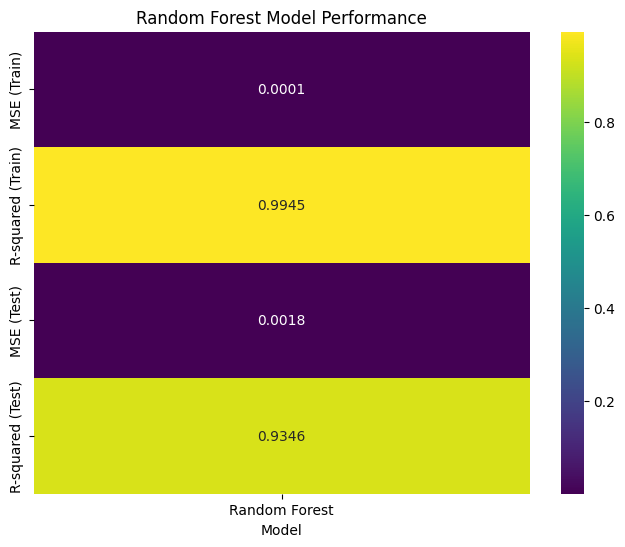

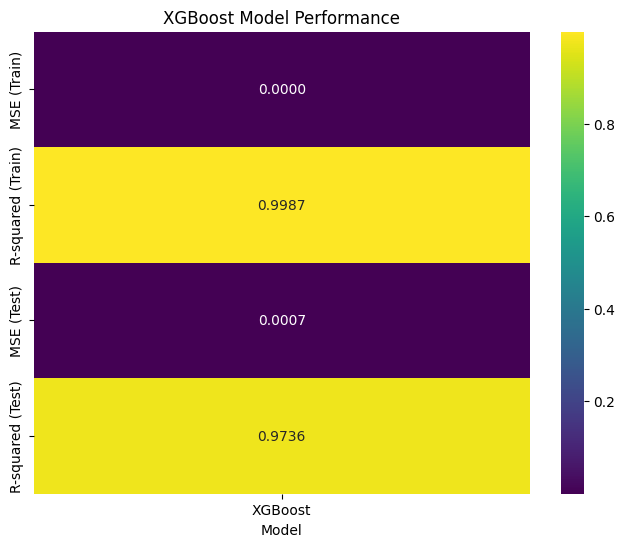

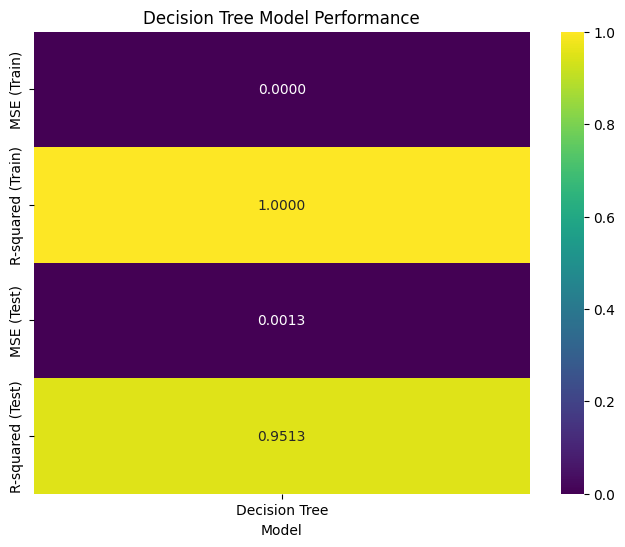

In [43]:
# Create a separate DataFrame for each model
rf_results = df_results[df_results['Model'] == 'Random Forest']
xgb_results = df_results[df_results['Model'] == 'XGBoost']
dt_results = df_results[df_results['Model'] == 'Decision Tree']

# Transpose the DataFrames for better heatmap visualization
rf_results = rf_results.set_index('Model').transpose()
xgb_results = xgb_results.set_index('Model').transpose()
dt_results = dt_results.set_index('Model').transpose()

# Create heatmaps for each model
plt.figure(figsize=(8, 6))
sns.heatmap(rf_results, annot=True, cmap='viridis', fmt=".4f")
plt.title('Random Forest Model Performance')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(xgb_results, annot=True, cmap='viridis', fmt=".4f")
plt.title('XGBoost Model Performance')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(dt_results, annot=True, cmap='viridis', fmt=".4f")
plt.title('Decision Tree Model Performance')
plt.show()


## LINEAR REPRESENTATION OF THE ERROR AND SPREAD OF THE DATA RESPECTIVELY OF MODELS TRAINED


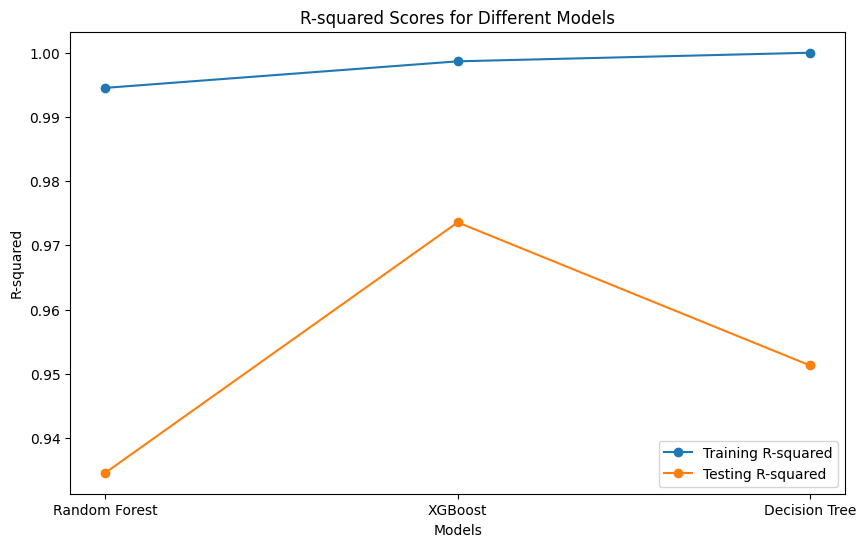

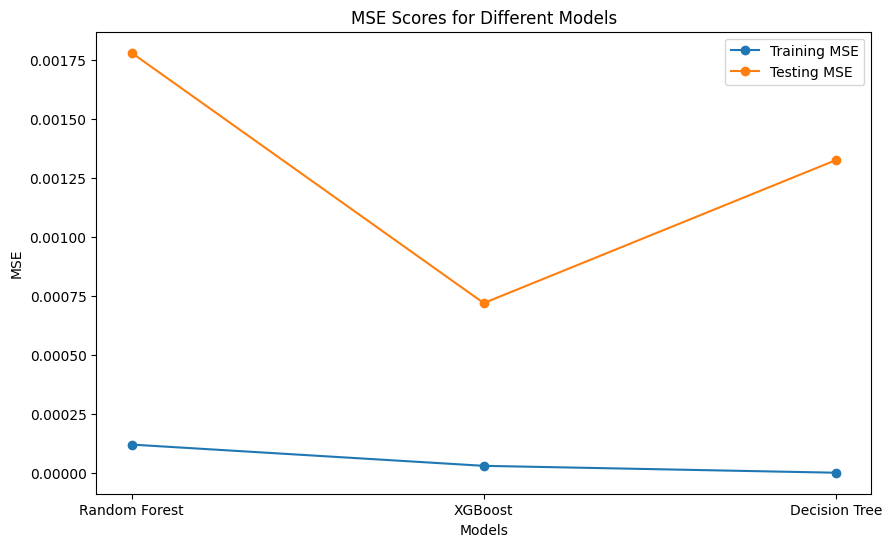

In [44]:
# Extract the R-squared and MSE scores for each model
rf_train_r2 = df_results[df_results['Model'] == 'Random Forest']['R-squared (Train)'].values[0]
rf_test_r2 = df_results[df_results['Model'] == 'Random Forest']['R-squared (Test)'].values[0]
rf_train_mse = df_results[df_results['Model'] == 'Random Forest']['MSE (Train)'].values[0]
rf_test_mse = df_results[df_results['Model'] == 'Random Forest']['MSE (Test)'].values[0]

xgb_train_r2 = df_results[df_results['Model'] == 'XGBoost']['R-squared (Train)'].values[0]
xgb_test_r2 = df_results[df_results['Model'] == 'XGBoost']['R-squared (Test)'].values[0]
xgb_train_mse = df_results[df_results['Model'] == 'XGBoost']['MSE (Train)'].values[0]
xgb_test_mse = df_results[df_results['Model'] == 'XGBoost']['MSE (Test)'].values[0]

dt_train_r2 = df_results[df_results['Model'] == 'Decision Tree']['R-squared (Train)'].values[0]
dt_test_r2 = df_results[df_results['Model'] == 'Decision Tree']['R-squared (Test)'].values[0]
dt_train_mse = df_results[df_results['Model'] == 'Decision Tree']['MSE (Train)'].values[0]
dt_test_mse = df_results[df_results['Model'] == 'Decision Tree']['MSE (Test)'].values[0]

# Create data for the line graph
models = ['Random Forest', 'XGBoost', 'Decision Tree']
train_r2 = [rf_train_r2, xgb_train_r2, dt_train_r2]
test_r2 = [rf_test_r2, xgb_test_r2, dt_test_r2]
train_mse = [rf_train_mse, xgb_train_mse, dt_train_mse]
test_mse = [rf_test_mse, xgb_test_mse, dt_test_mse]

# Plot the R-squared scores
plt.figure(figsize=(10, 6))
plt.plot(models, train_r2, label='Training R-squared', marker='o')
plt.plot(models, test_r2, label='Testing R-squared', marker='o')
plt.title('R-squared Scores for Different Models')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.legend()
plt.show()

# Plot the MSE scores
plt.figure(figsize=(10, 6))
plt.plot(models, train_mse, label='Training MSE', marker='o')
plt.plot(models, test_mse, label='Testing MSE', marker='o')
plt.title('MSE Scores for Different Models')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.legend()
plt.show()


# PREDICTING THE LEVELS OF ATTENTION

## INITIAL TASK

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [89]:
df=pd.read_csv("train_data.csv") #READING THE DATASET

In [90]:
df["remarks"] = "" #DEFINING NEW REMARK ROW
df["remarks"] = df["remarks"].astype(str) #DEFINING REMARK ROW AS STRING DATATYPE

In [91]:
df

,Fp1,AF3,F3,F7,FC5,FC1,C3,T7,CP5,CP1,...,CP2,P4,P8,PO4,O2,predicted_attention_values,predicted_attention_values_rf,predicted_attention_values_xgb,predicted_attention_values_dt,remarks
0,3.708934,5.061280,-3.123347,2.933691,-8.002952,-5.987876,-12.309737,-4.035778,-13.943238,-1.748344,...,-13.920140,-3.073565,12.077209,-13.161105,1.485378,0.376149,0.370656,0.369693,0.376149,
1,-7.927196,-11.433300,-8.027478,-9.650296,-2.199496,-4.937627,1.260075,-3.707411,1.952156,2.137765,...,6.196098,8.763370,5.331474,9.425410,6.502848,0.454463,0.445265,0.458441,0.454463,
2,-6.429932,-9.224808,-4.296097,-13.552336,-0.784173,0.385988,3.018256,-0.089954,9.238829,5.256932,...,4.150718,6.415456,-2.535387,4.890815,0.425112,0.671066,0.680448,0.670078,0.671066,
3,-0.638978,11.566954,2.720888,19.370928,0.446747,-0.701653,-7.308488,-3.126266,-9.966126,-13.806917,...,-1.876692,-4.606399,5.160490,1.660917,0.462608,0.287683,0.267930,0.287500,0.287683,
4,-1.660779,13.052952,1.298024,15.908965,-5.622669,-4.145418,-9.732799,21.106586,-5.339953,-2.491298,...,-12.963769,-11.276335,5.615886,-7.954498,1.090314,0.456741,0.434308,0.465668,0.456741,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5175,-2.739678,-8.666965,-4.951273,-4.821615,-1.857039,-5.496849,0.836375,9.287012,8.839384,6.140497,...,2.054439,3.791073,3.576241,3.385476,7.098856,0.549731,0.538637,0.542830,0.549731,
5176,-6.131051,-9.033860,1.364530,-2.649468,7.789189,1.918759,8.116557,-3.780967,15.642095,-4.563444,...,13.927784,4.362689,-9.307948,21.654076,4.743539,0.428787,0.414938,0.424148,0.428787,
5177,1.992827,-13.923473,-1.739318,-19.138329,2.194659,1.332673,6.587291,-27.003048,13.166949,1.181927,...,7.529173,9.874632,-5.366559,18.111398,8.903353,0.569833,0.568524,0.566547,0.569833,
5178,-3.165632,0.595415,1.143698,3.834827,-3.649280,1.088625,-2.709752,9.633999,-4.731030,1.500791,...,0.988282,-1.711769,-0.058135,-1.768902,-3.329238,0.490063,0.484966,0.496127,0.490063,


## SENTIMENT ANALYSIS OF TRAINING DATASET

In [92]:
'''ANALYZING THE SENTIMENTS OF THE COLUMN NAMED PREDICTED_ATTENTION_VALUES
THE BELOW UPCOMING COLUMN VALUES ARE IN RANGE 0 TO 1 AND AN ESTIMATED LEVEL OF ATTENTION
1) HIGH LEVEL ATTENTION IF THE VALUE IS GREATER THAN 0.7
2) MEDIUM LEVEL ATTENTION IF THE VALUE IS GREATER THAN 0.4
3) LOW LEVEL ATTENTION IF THE VALUE IS LESS THAN 0.4
HERE COMES THE FIRST COLUMN PREDICTED_ATTENTION_VALUES WHERE THE VALUES ARE CALCULATED ON THE BASIS OF THE COLUMN'S Fz,Pz,Cz,P3 AND TOOK THE AVERAGE OF THE 4 COLUMNS
'''
sid = SentimentIntensityAnalyzer()

def analyze_sentiment(value):
  if value > 0.7:
    return "High Attention"
  elif value >= 0.4:
    return "Medium Attention"
  else:
    return "Low Attention"

df["remarks"] = df["predicted_attention_values"].apply(lambda x: analyze_sentiment(x))

In [93]:
#FORMED A NEW COLUMN REMARKS_RF WHICH PREDICTS THE SENTIMENTS ON THE PREDICTED ATTENTION VALUES CALCULATED FROM RANDOM FOREST MODEL
df["remarks_rf"] = ""
df["remarks_rf"] = df["remarks_rf"].astype(str)
df["remarks_rf"] = df["predicted_attention_values_rf"].apply(lambda x: analyze_sentiment(x))


In [94]:
#FORMED A NEW COLUMN REMARKS_XGB WHICH PREDICTS THE SENTIMENTS ON THE PREDICTED ATTENTION VALUES CALCULATED FROM XG BOOST MODEL
df["remarks_xgb"] = ""
df["remarks_xgb"] = df["remarks_xgb"].astype(str)
df["remarks_xgb"] = df["predicted_attention_values_xgb"].apply(lambda x: analyze_sentiment(x))

In [95]:
#FORMED A NEW COLUMN REMARKS_RF WHICH PREDICTS THE SENTIMENTS ON THE PREDICTED ATTENTION VALUES CALCULATED FROM RANDOM FOREST MODEL
df["remarks_dt"] = ""
df["remarks_dt"] = df["remarks_dt"].astype(str)
df["remarks_dt"] = df["predicted_attention_values_dt"].apply(lambda x: analyze_sentiment(x))


## VISUALIZATION OF SENTIMENTS ON TRAINING DATASET

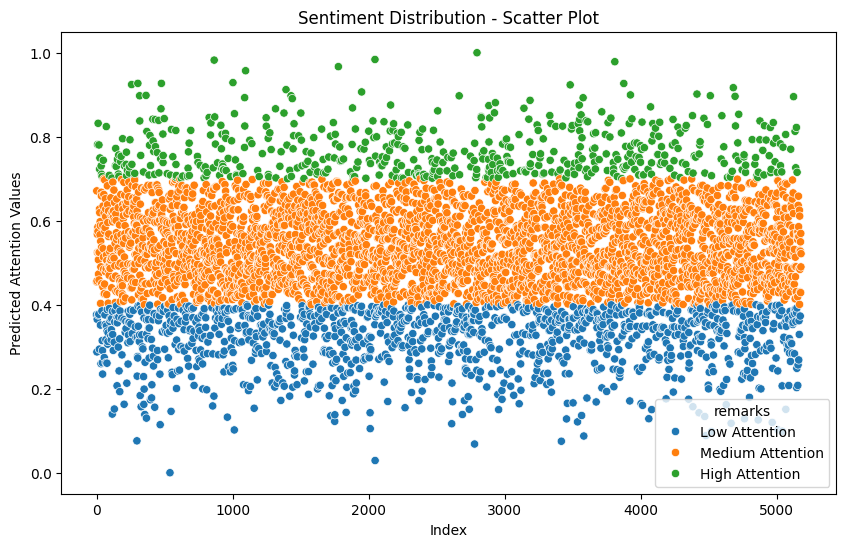

In [96]:
#FORMED SCATTERPLOT WHERE COMBINED SENTIMENT ANALYSIS HAS BEEN DONE OF ALL THE VALUES OF THE COLUMNS
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y="predicted_attention_values", hue="remarks", data=df)
plt.title('Sentiment Distribution - Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Predicted Attention Values')
plt.show()


## SENTIMENT ANALYSIS OF TEST DATASET

In [97]:
df2=pd.read_csv("test_data.csv")

In [98]:
df2

,Fp1,AF3,F3,F7,FC5,FC1,C3,T7,CP5,CP1,...,CP6,CP2,P4,P8,PO4,O2,predicted_attention_values,predicted_attention_values_xgb,predicted_attention_values_rf,predicted_attention_values_dt
0,6.320162,-0.234559,2.356869,-1.823733,-3.340450,2.554415,-1.001115,0.128430,-5.459169,3.884633,...,-6.415714,-6.378561,-3.018486,-2.960473,-11.917199,-4.147639,0.524197,0.525641,0.493411,0.562645
1,6.416361,9.940408,-6.074991,1.620283,-19.115582,-4.000969,-12.087116,-2.346815,-19.469181,8.820455,...,-31.784799,-17.029655,-7.863908,13.603051,-28.432839,-4.090133,0.610503,0.607269,0.597498,0.658009
2,1.141580,3.970722,-1.998272,-2.415111,-7.764394,-1.820080,-5.211620,18.033496,-13.912580,8.239763,...,-18.061967,-9.149463,-3.844114,7.463727,-18.134838,-2.518747,0.554600,0.540271,0.540501,0.609652
3,2.950906,7.546574,10.772559,18.865801,10.379121,3.075893,2.225614,11.453573,7.173757,-12.479187,...,11.622114,4.094541,-3.570784,-1.053991,11.607503,-2.681590,0.229576,0.181692,0.156875,0.281591
4,1.583368,-1.353345,4.790410,2.884923,9.139601,2.500170,1.362362,-14.288733,7.165662,-11.530635,...,16.916151,10.516769,6.717784,-2.470102,25.136304,8.324033,0.390916,0.378140,0.324538,0.423303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,-3.077082,14.155471,-1.875189,11.180827,-10.688096,-6.160869,-12.723077,13.581435,-20.138417,-1.173425,...,-16.231965,-11.410199,-8.720025,6.688255,-23.291725,-7.426291,0.398298,0.383852,0.382706,0.459261
1292,1.726140,6.488863,2.587332,4.473817,-1.580043,-1.609830,-3.549334,-0.566513,-2.494606,-4.856825,...,-3.933630,-3.387129,0.137872,3.912593,3.579224,4.621977,0.419394,0.397381,0.377072,0.450417
1293,-0.001702,2.552379,-4.160969,-7.023043,-10.799516,-1.594333,-2.870665,8.697271,-5.882982,10.884279,...,-23.735997,-10.718012,-5.548869,4.624518,-19.981360,-1.348932,0.685756,0.695151,0.676771,0.737980
1294,0.169927,9.209893,-1.758832,8.283532,-5.959253,-3.519469,-6.430982,10.588683,-5.725497,-3.770494,...,-7.945296,-3.945365,-5.486382,6.093570,-9.411298,-6.835111,0.373332,0.341231,0.332217,0.400705


In [99]:
#DID SAME COLUMN DISTRIBUTION THAT WE DID ON TRAINING DATASET
df2["remarks"] = ""
df2["remarks"] = df2["remarks"].astype(str)
df2["remarks"] = df2["predicted_attention_values"].apply(lambda x: analyze_sentiment(x))

df2["remarks_rf"] = ""
df2["remarks_rf"] = df2["remarks_rf"].astype(str)
df2["remarks_rf"] = df2["predicted_attention_values_rf"].apply(lambda x: analyze_sentiment(x))


df2["remarks_xgb"] = ""
df2["remarks_xgb"] = df2["remarks_xgb"].astype(str)
df2["remarks_xgb"] = df2["predicted_attention_values_xgb"].apply(lambda x: analyze_sentiment(x))


df2["remarks_dt"] = ""
df2["remarks_dt"] = df2["remarks_dt"].astype(str)
df2["remarks_dt"] = df2["predicted_attention_values_dt"].apply(lambda x: analyze_sentiment(x))



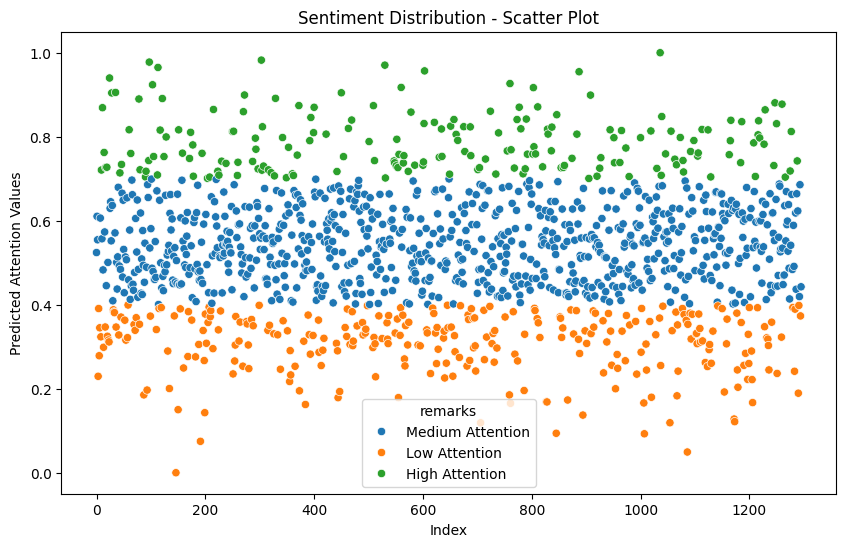

In [100]:
#PLOTTING THE SCATTERPLOT THAT WE DID AS IN TRAIN DATASET
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df2.index, y="predicted_attention_values", hue="remarks", data=df2)
plt.title('Sentiment Distribution - Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Predicted Attention Values')
plt.show()


# CONCLUSION

Based on the scatterplots, the model's performance on the test data appears to be similar to its performance on the training data.
Both datasets show a similar distribution of predicted attention values across different sentiment categories.
This suggests that the model generalizes well to unseen data.
However, a more detailed analysis, such as comparing specific metrics like accuracy or F1-score, would provide a more conclusive judgement.